<h1>Titanic Survival</h1>
<h3>Import libraries</h3>


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h3>Import data</h3>


In [ ]:
train = pd.read_csv("data/raw_data/train_data.csv")
test = pd.read_csv("data/raw_data/test_data.csv")

<h3>Description</h3>


In [ ]:
train.shape

(916, 15)

In [ ]:
test.shape

(393, 15)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  916 non-null    int64  
 1   Pclass	      916 non-null    int64  
 2   Survival     916 non-null    int64  
 3   Name         916 non-null    object 
 4   Sex          916 non-null    object 
 5   Age          724 non-null    float64
 6   SibSp        916 non-null    int64  
 7   Parch        916 non-null    int64  
 8   Ticket       916 non-null    object 
 9   Fare         915 non-null    float64
 10  Cabin        197 non-null    object 
 11  Embarked     915 non-null    object 
 12  Boat         345 non-null    object 
 13  Body         81 non-null     float64
 14  Home_Dest    515 non-null    object 
dtypes: float64(3), int64(5), object(7)
memory usage: 107.5+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  393 non-null    int64  
 1   Pclass	      393 non-null    int64  
 2   Survival     393 non-null    int64  
 3   Name         393 non-null    object 
 4   Sex          393 non-null    object 
 5   Age          322 non-null    float64
 6   SibSp        393 non-null    int64  
 7   Parch        393 non-null    int64  
 8   Ticket       393 non-null    object 
 9   Fare         393 non-null    float64
 10  Cabin        98 non-null     object 
 11  Embarked     392 non-null    object 
 12  Boat         141 non-null    object 
 13  Body         40 non-null     float64
 14  Home_Dest    230 non-null    object 
dtypes: float64(3), int64(5), object(7)
memory usage: 46.2+ KB


<h3>Check for Duplicate Rows</h3>


In [58]:
# Check for duplicate rows
duplicate_rows = train.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Display the duplicate rows (if any)
if num_duplicates > 0:
    print(train[duplicate_rows])

Number of duplicate rows: 0


In [ ]:
# Check for duplicate rows
duplicate_rows = test.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Display the duplicate rows (if any)
if num_duplicates > 0:
    print(test[duplicate_rows])

Number of duplicate rows: 0


<h3>Check for missing rows</h3>


In [9]:
# Check for missing values
missing_values = train.isnull().sum()

# Display missing values
missing_values[missing_values > 0]

Age          192
Fare           1
Cabin        719
Embarked       1
Boat         571
Body         835
Home_Dest    401
dtype: int64

In [10]:
# Check for missing values
missing_values = test.isnull().sum()

# Display missing values
missing_values[missing_values > 0]

Age           71
Cabin        295
Embarked       1
Boat         252
Body         353
Home_Dest    163
dtype: int64

In [11]:
#Check trailing spaces
print(train.columns.tolist())
print(test.columns.tolist())

['PassengerId', 'Pclass\t', 'Survival  ', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Boat', 'Body', 'Home_Dest']
['PassengerId', 'Pclass\t', 'Survival  ', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Boat', 'Body', 'Home_Dest']


In [12]:
#remove leading and trailing spaces from all column names:
train.columns = train.columns.str.strip()
test.columns = test.columns.str.strip()

In [13]:
#Check trailing spaces
print(train.columns.tolist())
print(test.columns.tolist())

['PassengerId', 'Pclass', 'Survival', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Boat', 'Body', 'Home_Dest']
['PassengerId', 'Pclass', 'Survival', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Boat', 'Body', 'Home_Dest']


<h1>Missing values</h1>

not needed data / fill the data:

- EMBARKED: - 1 missing value use mode
- FARE: - 1 missing value use median
- Drop : Home_Dest, Body, Boat, -- ?? Cabin (too many missing values)


In [14]:
# Fill missing values
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])  # Use mode() to fill most common value
train['Fare'] = train['Fare'].fillna(train['Fare'].median())  # Fill missing Fare with median

# Drop unnecessary columns (ignore if already missing)
train = train.drop(columns=['Boat', 'Body', 'Home_Dest'], errors='ignore')

# Check if missing values are handled
print("Missing values after cleaning:")
print("Embarked:", train['Embarked'].isnull().sum())
print("Fare:", train['Fare'].isnull().sum())

# Show remaining columns
print("Remaining columns:", train.columns)


Missing values after cleaning:
Embarked: 0
Fare: 0
Remaining columns: Index(['PassengerId', 'Pclass', 'Survival', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [15]:
train

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,1,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S
1,2,1,0,"McCaffry, Mr. Thomas Francis",male,46.0,0,0,13050,75.2417,C6,C
2,3,3,0,"Goncalves, Mr. Manuel Estanslas",male,38.0,0,0,SOTON/O.Q. 3101306,7.0500,NaN,S
3,4,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
4,5,2,1,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
911,912,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
912,913,2,1,"Smith, Miss. Marion Elsie",female,40.0,0,0,31418,13.0000,NaN,S
913,914,3,0,"Lobb, Mrs. William Arthur (Cordelia K Stanlick)",female,26.0,1,0,A/5. 3336,16.1000,NaN,S
914,915,1,0,"Rowe, Mr. Alfred G",male,33.0,0,0,113790,26.5500,NaN,S


<h3>Use sex, parch, sibsp to calculate missing ages </h3>


In [16]:
from sklearn.ensemble import RandomForestRegressor

# Select features to predict Age
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Convert categorical variables to numerical
df_encoded = pd.get_dummies(train[features], drop_first=True)

# Split data into known and missing Age values
known_age = train[train['Age'].notnull()]
missing_age = train[train['Age'].isnull()]

# Features and target for training
X_train = pd.get_dummies(known_age[features], drop_first=True)
y_train = known_age['Age']

# Features for missing values (no target)
X_missing = pd.get_dummies(missing_age[features], drop_first=True)

In [17]:
# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict missing Age values
predicted_ages = model.predict(X_missing)

# Fill missing Age values with predictions
train.loc[train['Age'].isnull(), 'Age'] = predicted_ages

In [18]:
train['Age'].isnull().sum()  # Should return 0

np.int64(0)

In [19]:
train.isnull().sum()

PassengerId      0
Pclass           0
Survival         0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          719
Embarked         0
dtype: int64

In [20]:
# Fill missing values
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])  # Use mode() to fill most common value
test['Fare'] = test['Fare'].fillna(test['Fare'].median())  # Fill missing Fare with median

# Drop unnecessary columns (ignore if already missing)
test = test.drop(columns=['Boat', 'Body', 'Home_Dest'], errors='ignore')

# Check if missing values are handled
print("Missing values after cleaning:")
print("Embarked:", test['Embarked'].isnull().sum())
print("Fare:", test['Fare'].isnull().sum())

# Show remaining columns
print("Remaining columns:", test.columns)

Missing values after cleaning:
Embarked: 0
Fare: 0
Remaining columns: Index(['PassengerId', 'Pclass', 'Survival', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [21]:
from sklearn.ensemble import RandomForestRegressor

# Select features to predict Age
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Convert categorical variables to numerical
df_encoded = pd.get_dummies(test[features], drop_first=True)

# Split data into known and missing Age values
known_age = test[test['Age'].notnull()]
missing_age = test[test['Age'].isnull()]

# Features and target for training
X_train = pd.get_dummies(known_age[features], drop_first=True)
y_train = known_age['Age']

# Features for missing values (no target)
X_missing = pd.get_dummies(missing_age[features], drop_first=True)

In [22]:
# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict missing Age values
predicted_ages = model.predict(X_missing)

# Fill missing Age values with predictions
test.loc[test['Age'].isnull(), 'Age'] = predicted_ages


In [23]:
test['Age'].isnull().sum()  # Should return 0

np.int64(0)

In [24]:
test.isnull().sum()

PassengerId      0
Pclass           0
Survival         0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          295
Embarked         0
dtype: int64

<h1>Exploratory Data Analysis (EDA) </h1>


<h3>Let us first visualize the number of survivors and death counts</h3>


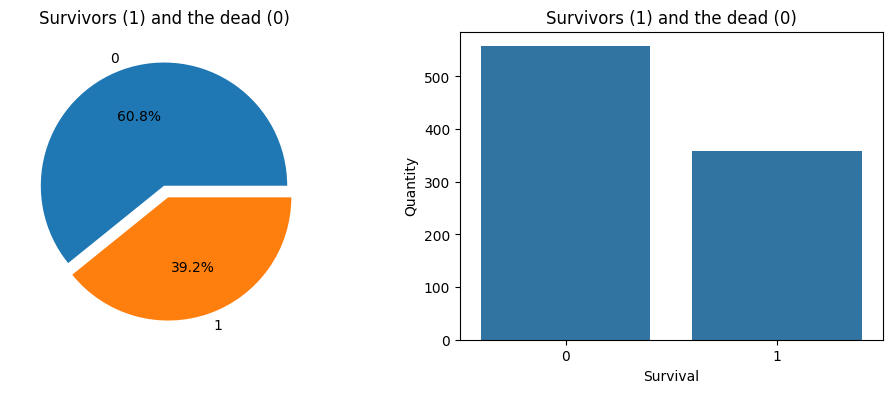

In [25]:
f, ax = plt.subplots(1, 2, figsize=(12, 4)) 
train['Survival'].value_counts().plot.pie( 
    explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=False) 
ax[0].set_title('Survivors (1) and the dead (0)') 
ax[0].set_ylabel('') 
sns.countplot(x='Survival', data=train, ax=ax[1])
ax[1].set_ylabel('Quantity') 
ax[1].set_title('Survivors (1) and the dead (0)') 
plt.show()

<h3> Analyzing the Impact of Sex on Survival Rates </h3>


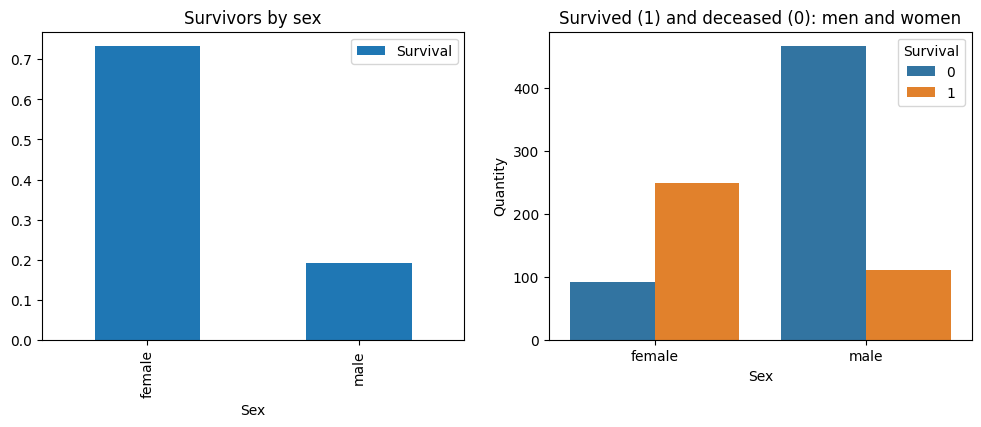

In [26]:
f, ax = plt.subplots(1, 2, figsize=(12, 4)) 
train[['Sex', 'Survival']].groupby(['Sex']).mean().plot.bar(ax=ax[0]) 
ax[0].set_title('Survivors by sex') 
sns.countplot(x='Sex', hue='Survival', data=train, ax=ax[1])
ax[1].set_ylabel('Quantity') 
ax[1].set_title('Survived (1) and deceased (0): men and women') 
plt.show()

In [27]:
# Check the first few rows
print(train.head())

# Check data types and missing values
print(train.info())

# Check summary statistics
print(train.describe())


   PassengerId  Pclass  Survival  \
0            1       3         1   
1            2       1         0   
2            3       3         0   
3            4       1         1   
4            5       2         1   

                                                Name     Sex   Age  SibSp  \
0  Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...  female  24.0      0   
1                       McCaffry, Mr. Thomas Francis    male  46.0      0   
2                    Goncalves, Mr. Manuel Estanslas    male  38.0      0   
3                  Andrews, Miss. Kornelia Theodosia  female  63.0      1   
4  Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...  female  29.0      1   

   Parch              Ticket     Fare Cabin Embarked  
0      2             PP 9549  16.7000    G6        S  
1      0               13050  75.2417    C6        C  
2      0  SOTON/O.Q. 3101306   7.0500   NaN        S  
3      0               13502  77.9583    D7        S  
4      0                2926  26.0000   NaN  

- First-class passengers (Pclass=1) had higher survival rates.
- Third-class passengers (Pclass=3) had the lowest survival rates.
- People who embarked from Cherbourg (C) had a higher survival rate.


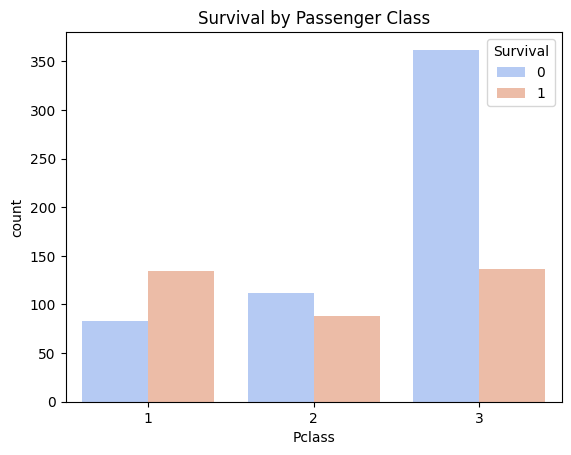

In [28]:
sns.countplot(data=train, x='Pclass', hue='Survival', palette='coolwarm')
plt.title("Survival by Passenger Class")
plt.show()


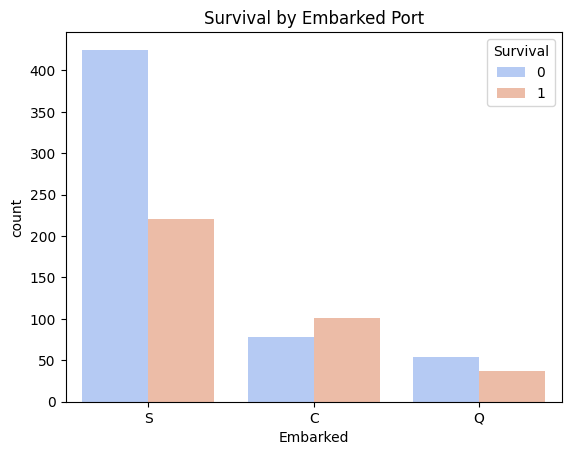

In [29]:
sns.countplot(data=train, x='Embarked', hue='Survival', palette='coolwarm')
plt.title("Survival by Embarked Port")
plt.show()

Numeric Features & Survival

- Age Distribution


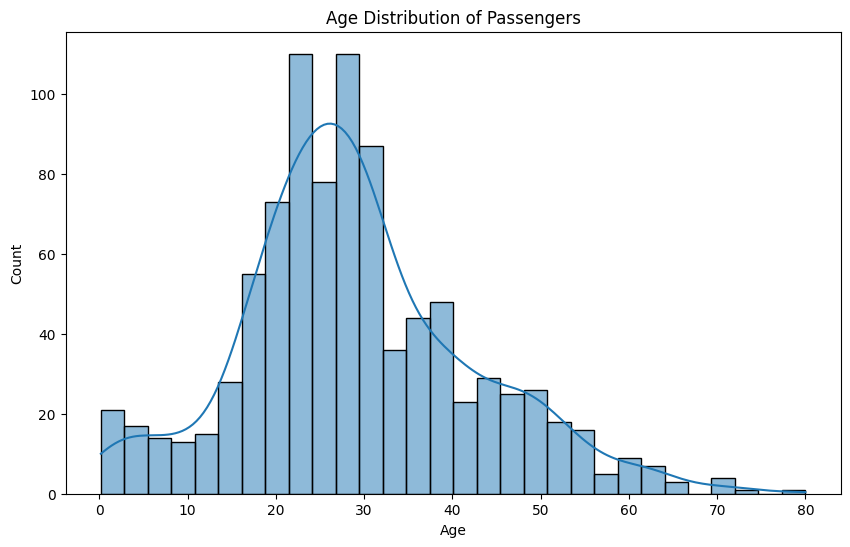

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(train['Age'], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.show()

C:\Users\minad\AppData\Local\Temp\ipykernel_12480\2074253570.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='Survival', y='Age', palette='coolwarm')


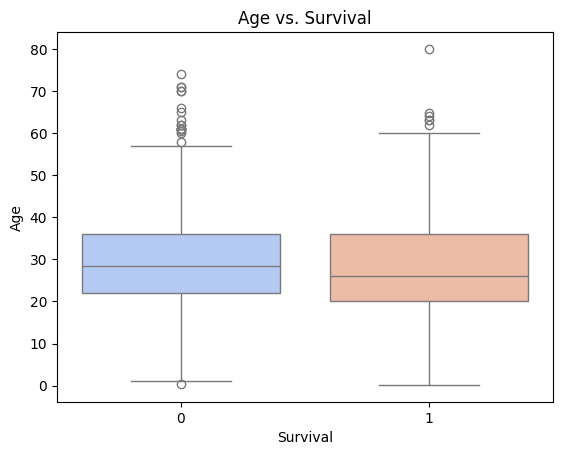

In [31]:
sns.boxplot(data=train, x='Survival', y='Age', palette='coolwarm')
plt.title("Age vs. Survival")
plt.show()

- fare disribution:


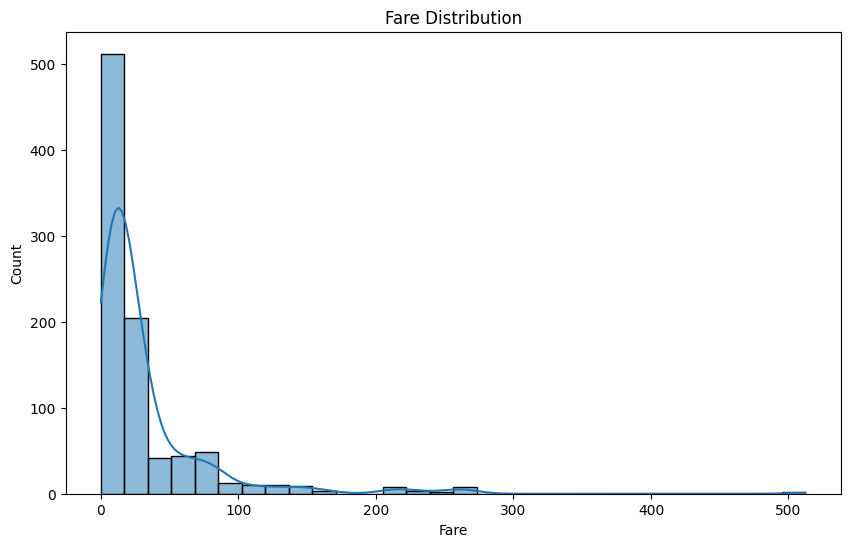

In [32]:
plt.figure(figsize=(10,6))
sns.histplot(train['Fare'], bins=30, kde=True)
plt.title("Fare Distribution")
plt.show()

C:\Users\minad\AppData\Local\Temp\ipykernel_12480\1255406394.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='Survival', y='Fare', palette='coolwarm')


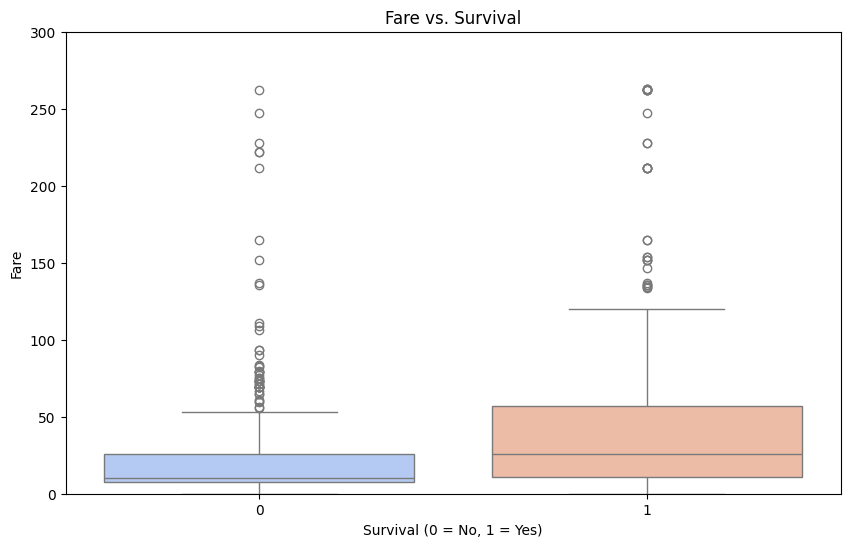

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(data=train, x='Survival', y='Fare', palette='coolwarm')
plt.title("Fare vs. Survival")
plt.xlabel("Survival (0 = No, 1 = Yes)")
plt.ylabel("Fare")
plt.ylim(0, 300)  # Limit Fare range to avoid extreme outliers
plt.show()


In [34]:
from scipy.stats import mannwhitneyu

# Separate fares by survival group
fare_survived = train[train['Survival'] == 1]['Fare']
fare_not_survived = train[train['Survival'] == 0]['Fare']

# Perform the test
stat, p_value = mannwhitneyu(fare_survived, fare_not_survived)
print(f"Mann-Whitney U Test p-value: {p_value}")


Mann-Whitney U Test p-value: 1.878268014756478e-18


<h2>Feature engeneering</h2>


In [35]:
train.head()

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,1,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S
1,2,1,0,"McCaffry, Mr. Thomas Francis",male,46.0,0,0,13050,75.2417,C6,C
2,3,3,0,"Goncalves, Mr. Manuel Estanslas",male,38.0,0,0,SOTON/O.Q. 3101306,7.0500,NaN,S
3,4,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
4,5,2,1,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,NaN,S


In [36]:
test.head()

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,917,3,0,"Caram, Mrs. Joseph (Maria Elias)",female,23.996405,1,0,2689,14.4583,NaN,C
1,918,2,0,"Nesson, Mr. Israel",male,26.000000,0,0,244368,13.0000,F2,S
2,919,1,1,"Bird, Miss. Ellen",female,29.000000,0,0,PC 17483,221.7792,C97,S
3,920,2,1,"Buss, Miss. Kate",female,36.000000,0,0,27849,13.0000,NaN,S
4,921,3,1,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judi...",female,22.000000,1,0,347072,13.9000,NaN,S


- Extract the Deck Letter
- Create a Family Size Feature
- Identify Passengers Traveling Alone
- Extract Title from Names
- Categorize Fare into Groups
- Categorize Age into Groups ??
- Drop Unnecessary Columns
- Encode Categorical Variables


In [37]:
# Fill missing Cabin values with 'Unknown' and extract the first letter
train['Deck'] = train['Cabin'].fillna('Unknown').str[0]
test['Deck'] = test['Cabin'].fillna('Unknown').str[0]

# Check unique deck values
print(train['Deck'].value_counts())


Deck
U    719
C     61
B     45
D     28
E     26
A     16
F     15
G      5
T      1
Name: count, dtype: int64


In [38]:
# Create Family Size Feature
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

- Large families might have struggled to survive.

- Solo travelers may have had fewer chances of rescue.


In [39]:
# Create an "IsAlone" feature (1 = Alone, 0 = With Family)
train['IsAlone'] = (train['FamilySize'] == 1).astype(int)
test['IsAlone'] = (test['FamilySize'] == 1).astype(int)

In [40]:
# Extract title from Name
train['Title'] = train['Name'].str.extract(r' ([A-Za-z]+)\.')
test['Title'] = test['Name'].str.extract(r' ([A-Za-z]+)\.')

# Replace rare titles with "Other"
title_replacements = {
    'Mlle': 'Miss', 'Mme': 'Mrs', 'Ms': 'Miss',
    'Dr': 'Other', 'Rev': 'Other', 'Col': 'Other',
    'Major': 'Other', 'Capt': 'Other', 'Sir': 'Other',
    'Lady': 'Other', 'Don': 'Other', 'Jonkheer': 'Other', 'Countess': 'Other'
}

train['Title'] = train['Title'].replace(title_replacements)
test['Title'] = test['Title'].replace(title_replacements)

# Check unique titles
print(train['Title'].value_counts())

Title
Mr        512
Miss      195
Mrs       141
Master     45
Other      22
Dona        1
Name: count, dtype: int64


- Some titles may indicate higher survival chances (Master, Miss, Mrs).

- Rare titles are grouped into "Other" to avoid too many categories.


In [41]:
# Create Fare Bins
train['FareGroup'] = pd.qcut(train['Fare'], 4, labels=[0, 1, 2, 3])
test['FareGroup'] = pd.qcut(test['Fare'], 4, labels=[0, 1, 2, 3])

- Fare outliers are handled better.
- Groups make it easier for tree-based models to learn patterns.


In [42]:
# Create Age Groups
train['AgeGroup'] = pd.cut(train['Age'], bins=[0, 12, 18, 35, 60, 100], labels=[0, 1, 2, 3, 4])
test['AgeGroup'] = pd.cut(test['Age'], bins=[0, 12, 18, 35, 60, 100], labels=[0, 1, 2, 3, 4])


- Age may impact survival (Children may have higher survival rates)


In [43]:
train= train.drop(columns=['Name', 'Ticket',])


In [44]:
test= test.drop(columns =['Name', 'Ticket'])

In [45]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to categorical features
categorical_cols = ['Sex', 'Embarked', 'Deck', 'Title']

for col in categorical_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])  # Ensure test uses same encoding


In [46]:
train

,PassengerId,Pclass,Survival,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck,FamilySize,IsAlone,Title,FareGroup,AgeGroup
0,1,3,1,0,24.000000,0,2,16.7000,G6,2,6,3,0,4,2,2
1,2,1,0,1,46.000000,0,0,75.2417,C6,0,2,1,1,3,3,3
2,3,3,0,1,38.000000,0,0,7.0500,NaN,2,8,1,1,3,0,3
3,4,1,1,0,63.000000,1,0,77.9583,D7,2,3,2,0,2,3,4
4,5,2,1,0,29.000000,1,0,26.0000,NaN,2,8,2,0,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,912,1,1,0,28.337333,1,0,146.5208,B78,0,1,2,0,4,3,2
912,913,2,1,0,40.000000,0,0,13.0000,NaN,2,8,1,1,2,1,3
913,914,3,0,0,26.000000,1,0,16.1000,NaN,2,8,2,0,4,2,2
914,915,1,0,1,33.000000,0,0,26.5500,NaN,2,8,1,1,3,2,2


In [47]:
test

,PassengerId,Pclass,Survival,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck,FamilySize,IsAlone,Title,FareGroup,AgeGroup
0,917,3,0,0,23.996405,1,0,14.4583,NaN,0,8,2,0,4,2,2
1,918,2,0,1,26.000000,0,0,13.0000,F2,2,5,1,1,3,1,2
2,919,1,1,0,29.000000,0,0,221.7792,C97,2,2,1,1,2,3,2
3,920,2,1,0,36.000000,0,0,13.0000,NaN,2,8,1,1,2,1,3
4,921,3,1,0,22.000000,1,0,13.9000,NaN,2,8,2,0,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,1305,3,0,1,42.000000,0,0,7.6500,F G63,2,5,1,1,3,0,3
389,1306,3,0,1,17.000000,0,0,7.8958,NaN,2,8,1,1,3,0,1
390,1307,1,0,1,40.000000,0,0,0.0000,B94,2,1,1,1,3,0,3
391,1308,3,0,0,9.000000,4,2,31.2750,NaN,2,8,7,0,2,2,0


drop cabin:

- too many missing values
- only numerical values needed


In [48]:
train= train.drop(columns=['Cabin',])
test= test.drop(columns=['Cabin', ])


In [49]:
train

,PassengerId,Pclass,Survival,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,FamilySize,IsAlone,Title,FareGroup,AgeGroup
0,1,3,1,0,24.000000,0,2,16.7000,2,6,3,0,4,2,2
1,2,1,0,1,46.000000,0,0,75.2417,0,2,1,1,3,3,3
2,3,3,0,1,38.000000,0,0,7.0500,2,8,1,1,3,0,3
3,4,1,1,0,63.000000,1,0,77.9583,2,3,2,0,2,3,4
4,5,2,1,0,29.000000,1,0,26.0000,2,8,2,0,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,912,1,1,0,28.337333,1,0,146.5208,0,1,2,0,4,3,2
912,913,2,1,0,40.000000,0,0,13.0000,2,8,1,1,2,1,3
913,914,3,0,0,26.000000,1,0,16.1000,2,8,2,0,4,2,2
914,915,1,0,1,33.000000,0,0,26.5500,2,8,1,1,3,2,2


In [50]:
test


,PassengerId,Pclass,Survival,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,FamilySize,IsAlone,Title,FareGroup,AgeGroup
0,917,3,0,0,23.996405,1,0,14.4583,0,8,2,0,4,2,2
1,918,2,0,1,26.000000,0,0,13.0000,2,5,1,1,3,1,2
2,919,1,1,0,29.000000,0,0,221.7792,2,2,1,1,2,3,2
3,920,2,1,0,36.000000,0,0,13.0000,2,8,1,1,2,1,3
4,921,3,1,0,22.000000,1,0,13.9000,2,8,2,0,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,1305,3,0,1,42.000000,0,0,7.6500,2,5,1,1,3,0,3
389,1306,3,0,1,17.000000,0,0,7.8958,2,8,1,1,3,0,1
390,1307,1,0,1,40.000000,0,0,0.0000,2,1,1,1,3,0,3
391,1308,3,0,0,9.000000,4,2,31.2750,2,8,7,0,2,2,0


<h2>Feature correlation</h2>


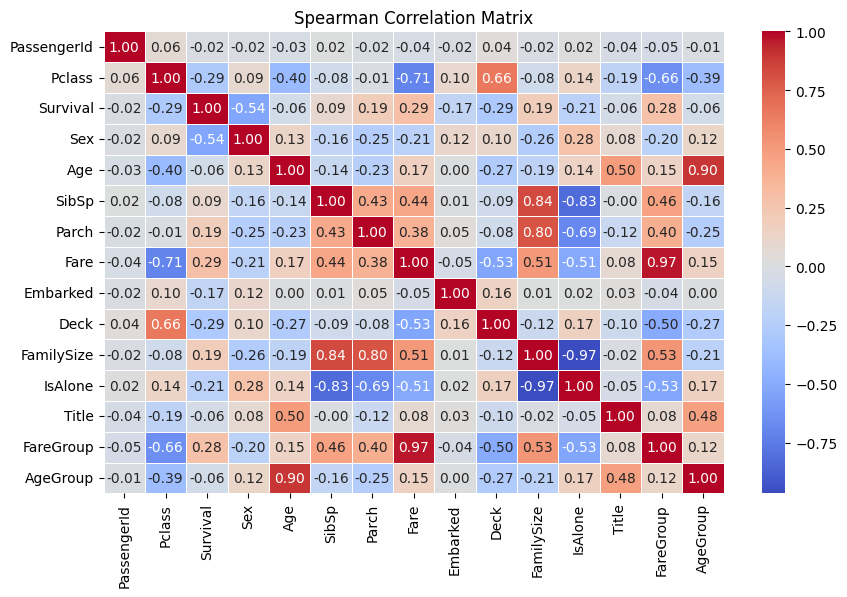

Survival       1.000000
Fare           0.289745
FareGroup      0.278671
FamilySize     0.186974
Parch          0.186065
SibSp          0.094963
PassengerId   -0.015261
Title         -0.059481
Age           -0.060995
AgeGroup      -0.061604
Embarked      -0.169279
IsAlone       -0.211680
Pclass        -0.287439
Deck          -0.294092
Sex           -0.535770
Name: Survival, dtype: float64


In [51]:
# Compute Spearman correlation
spearman_corr = train.corr(method='spearman')

# Print as a matrix
plt.figure(figsize=(10, 6))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Spearman Correlation Matrix")
plt.show()

# Print correlation values in sorted order
print(spearman_corr["Survival"].sort_values(ascending=False))

<h3> Multicollinearity: Check Variance Inflation Factor (VIF)</h3>


In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Selecting relevant numerical features
features = ['Pclass', 'Fare', 'FareGroup', 'FamilySize', 'Parch', 'SibSp', 'Title',
            'Age', 'AgeGroup', 'Embarked', 'IsAlone', 'Deck', 'Sex']
X = train[features]

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Print VIF results
print(vif_data.sort_values(by="VIF", ascending=False))


       Feature         VIF
3   FamilySize  466.708109
5        SibSp   97.463650
4        Parch   75.209310
8     AgeGroup    6.751142
7          Age    6.694011
0       Pclass    3.876805
2    FareGroup    3.440911
10     IsAlone    2.491859
11        Deck    2.206245
1         Fare    1.893895
6        Title    1.511902
12         Sex    1.134063
9     Embarked    1.095212


<h4>Feature Selection (Based on Correlation & VIF)</h4>
Based on your correlation:

- Remove: FareGroup (correlated with Fare)
- Remove: AgeGroup (correlated with Age)
- Remove: PassengerId (irrelevant to survival)
- Keep: Deck, Sex, Fare, Pclass, and IsAlone (strong predictors)


In [53]:
selected_features = ['Pclass', 'Fare', 'FamilySize', 'Parch', 'SibSp', 
                     'Title', 'Age', 'Embarked', 'IsAlone', 'Deck', 'Sex']

X_train_selected = train[selected_features]
X_test_selected = test[selected_features]

print("✅ Final features selected:", X_train_selected.columns)



✅ Final features selected: Index(['Pclass', 'Fare', 'FamilySize', 'Parch', 'SibSp', 'Title', 'Age',
       'Embarked', 'IsAlone', 'Deck', 'Sex'],
      dtype='object')


<h2>Logistic Regression</h2>


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define target variable
y_train = train['Survival']
y_test = test['Survival']  # Ensure test has 'Survival', or split train instead

# Train a Logistic Regression model
logreg = LogisticRegression(max_iter=500, random_state=42)
logreg.fit(X_train_selected, y_train)

# Predictions
y_pred_train = logreg.predict(X_train_selected)
y_pred_test = logreg.predict(X_test_selected)

# Model Evaluation
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"✅ Training Accuracy: {train_accuracy:.4f}")
print(f"✅ Test Accuracy: {test_accuracy:.4f}")

# Print classification report and confusion matrix
print("\n🔹 Classification Report (Test Data):")
print(classification_report(y_test, y_pred_test))

print("\n🔹 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))


✅ Training Accuracy: 0.7860
✅ Test Accuracy: 0.7939

🔹 Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       252
           1       0.73      0.67      0.70       141

    accuracy                           0.79       393
   macro avg       0.78      0.77      0.77       393
weighted avg       0.79      0.79      0.79       393


🔹 Confusion Matrix:
[[217  35]
 [ 46  95]]


<h2>Xgboots model</h2>


In [55]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define target variable
y_train = train['Survival']
y_test = test['Survival']  # Ensure test has 'Survival', or split train instead

# Initialize and train XGBoost classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train_selected, y_train)

# Make predictions
y_pred_train_xgb = xgb_model.predict(X_train_selected)
y_pred_test_xgb = xgb_model.predict(X_test_selected)

# Model Evaluation
train_accuracy_xgb = accuracy_score(y_train, y_pred_train_xgb)
test_accuracy_xgb = accuracy_score(y_test, y_pred_test_xgb)

print(f"✅ XGBoost Training Accuracy: {train_accuracy_xgb:.4f}")
print(f"✅ XGBoost Test Accuracy: {test_accuracy_xgb:.4f}")

# Print classification report and confusion matrix
print("\n🔹 XGBoost Classification Report (Test Data):")
print(classification_report(y_test, y_pred_test_xgb))

print("\n🔹 XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test_xgb))

✅ XGBoost Training Accuracy: 0.8723
✅ XGBoost Test Accuracy: 0.8321

🔹 XGBoost Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       252
           1       0.86      0.64      0.73       141

    accuracy                           0.83       393
   macro avg       0.84      0.79      0.80       393
weighted avg       0.84      0.83      0.83       393


🔹 XGBoost Confusion Matrix:
[[237  15]
 [ 51  90]]


<h2>Comparison</h2>


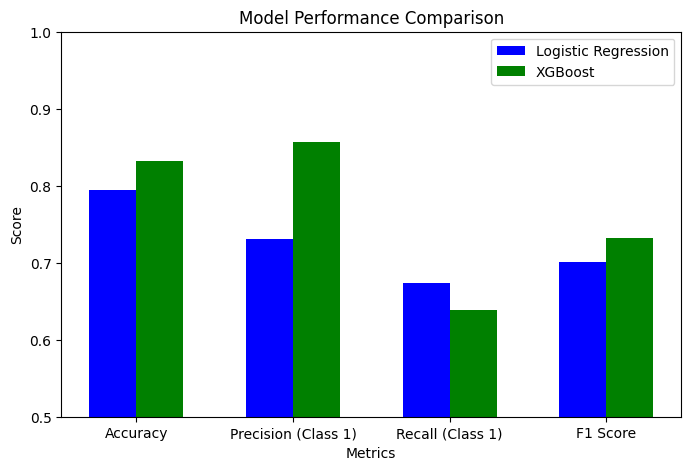

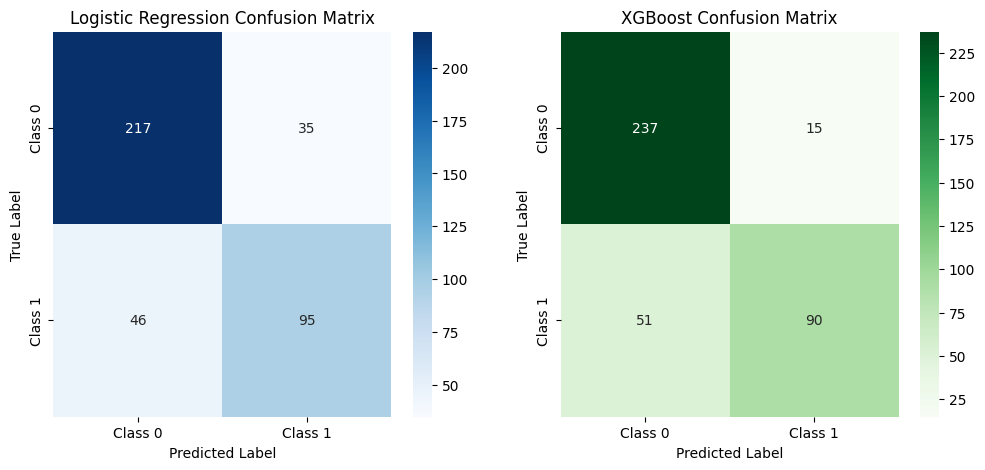

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Compute metrics for both models
metrics = ["Accuracy", "Precision (Class 1)", "Recall (Class 1)", "F1 Score"]

logreg_values = [
    accuracy_score(y_test, y_pred_test),
    precision_score(y_test, y_pred_test),
    recall_score(y_test, y_pred_test),
    f1_score(y_test, y_pred_test)
]

xgb_values = [
    accuracy_score(y_test, y_pred_test_xgb),
    precision_score(y_test, y_pred_test_xgb),
    recall_score(y_test, y_pred_test_xgb),
    f1_score(y_test, y_pred_test_xgb)
]

x = np.arange(len(metrics))
width = 0.3  

# Create bar chart
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x - width/2, logreg_values, width, label='Logistic Regression', color='blue')
ax.bar(x + width/2, xgb_values, width, label='XGBoost', color='green')

ax.set_xlabel("Metrics")
ax.set_ylabel("Score")
ax.set_title("Model Performance Comparison")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
plt.ylim(0.5, 1.0)  # Keep graph within relevant range
plt.show()

# Confusion Matrix Comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression Confusion Matrix
cm_logreg = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"], ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# XGBoost Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_test_xgb)
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Greens", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"], ax=axes[1])
axes[1].set_title("XGBoost Confusion Matrix")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.show()


<b>Higher Accuracy:<b>

XGBoost has a test accuracy of 0.8321, while Logistic Regression achieves 0.7939.
This means XGBoost makes fewer incorrect predictions overall.

<b> Better Precision:<b>

XGBoost's precision (0.86) is higher than Logistic Regression (0.73).
This means XGBoost has fewer false positives, making it a more reliable classifier when predicting the positive class.

<b> Improved Handling of Complex Data:<b>

Logistic Regression assumes linear relationships, while XGBoost captures non-linear patterns better.
If your data has interactions or non-linear dependencies, XGBoost will perform better.

<b>Stronger F1 Score & Balanced Performance:<b>

XGBoost’s F1 score (0.83) is close to Logistic Regression’s 0.79.
It maintains a balance between precision and recall, making it more robust.

<b>Confusion Matrix Advantage: <b>

XGBoost predicts more true positives while reducing false positives.
This leads to a better classification balance compared to Logistic Regression.


In [57]:
import pandas as pd

# Ensure 'PassengerId' exists in the test dataset
if "PassengerId" not in test.columns:
    raise KeyError("Error: 'PassengerId' column is missing from the test dataset!")

# Make final predictions using the trained XGBoost model
final_predictions = xgb_model.predict(X_test_selected)

# Create a DataFrame for submission
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],  # Make sure 'PassengerId' is in the test set
    "Survival": final_predictions
})

# Save as CSV
submission.to_csv("submission_xgboost.csv", index=False)

print("✅ Submission file 'submission_xgboost.csv' created successfully!")


✅ Submission file 'submission_xgboost.csv' created successfully!
